In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../../../../../src/")
import nanonets_utils
from scipy.optimize import curve_fit
plt.style.use(["science","bright","grid"])

def exp_func(x, a, b, c):
    return -a*np.exp(-b*x) + c
def exp_func2(x, a, b, c, d):
    return a*np.exp(b*(x-c)) + d

def saturation_cuve(t, tau, a0, t0):
    return a0*(1 - np.exp(-(t-t0) / tau))

def stretched_saturation_curve(t, tau, a0, t0, beta):
    return a0*(1 - np.exp(-((t-t0)/tau)**beta))

def double_saturation_cuve(t, tau1, tau2, a0, b0, b1):
    return a0 - b0* np.exp(-t / tau1) - b1* np.exp(-t / tau2)

def lin_func(x, a, b, c):
    return a*(x-b)+c

## String

In [403]:
folder  = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
t_vals  = np.arange(4999)*1e-7*1e6
N_vals  = np.arange(2,13)

data_string     = {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2.csv") for N_p in N_vals}
states_string   = pd.read_csv(f"{folder}mean_state_Nx=12_Ny=1_Nz=1_Ne=2.csv")

In [404]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[2000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data_string[N]['Current'].values[starts[i]:stops[i]]*1000
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,90], bounds=((1,70,-np.inf),(50,110,np.inf)))
    p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,0], bounds=[(0,70,0),(50,120,10)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([1.64367446e+00, 1.03092211e+02, 2.34750819e-29]),
 array([3.52310983e+00, 9.85177037e+01, 1.56568918e-33]),
 array([6.03002594e+00, 1.02555892e+02, 1.36812441e-24]),
 array([ 4.51076447, 81.78588838,  0.54850853]),
 array([1.46566584e+01, 1.00650115e+02, 5.69338290e-20]),
 array([ 9.53308193, 81.68509592,  1.30011202]),
 array([16.74520406, 86.926861  ,  1.07015093]),
 array([17.07929054, 81.26574097,  2.36883186]),
 array([22.31834697, 80.99601496,  3.09348148]),
 array([27.61945372, 80.22323324,  3.90070556]),
 array([33.32573777, 79.25614312,  5.00137167])]

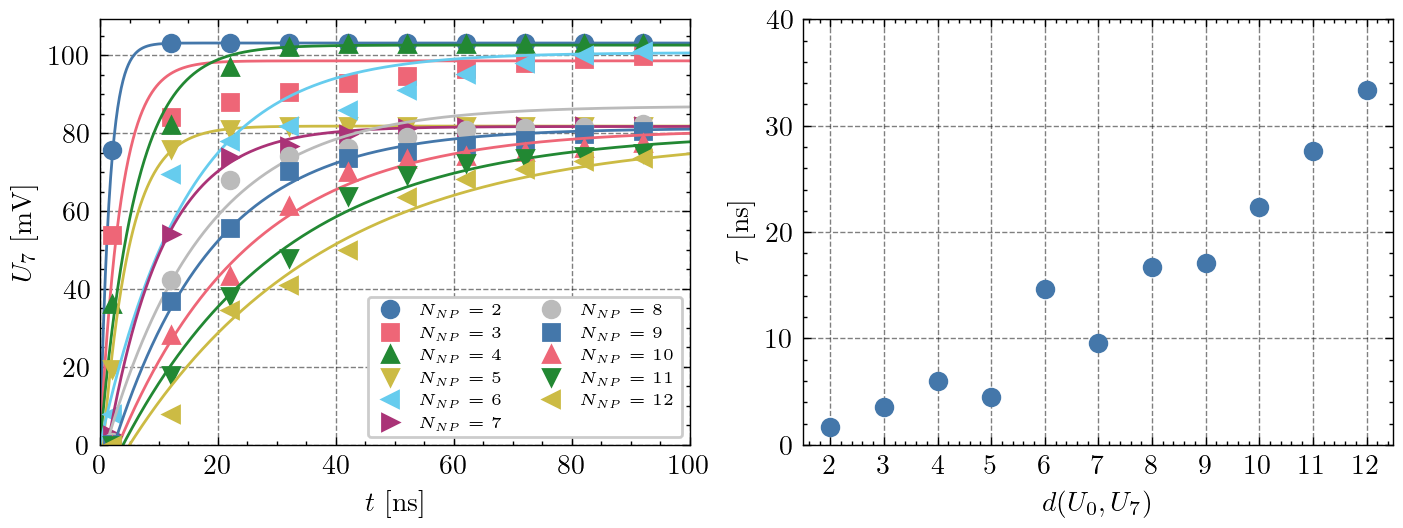

In [408]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data_string[N]['Current'].values*1000
    y_val_e = data_string[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    ax.plot(t_vals, saturation_cuve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='xx-small', ncol=2)
ax.set_xlim(0,100)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, 'o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,40)

fig.savefig("../plots/string_time_scale_vs_system_size.svg", transparent=True)
fig.savefig("../plots/string_time_scale_vs_system_size.pdf", transparent=False)

## String @ 10K

In [13]:
T_fold  = "maxT"
# folder  = f"/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/{T_fold}/"
folder  = f"/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/{T_fold}/"
t_vals  = np.arange(4999)*1e-7*1e6
N_vals  = np.arange(2,13)

data_string_T   = {N_p : pd.read_csv(f"{folder}Nx={N_p}_Ny=1_Nz=1_Ne=2.csv") for N_p in N_vals}
states_string_T = pd.read_csv(f"{folder}mean_state_Nx=12_Ny=1_Nz=1_Ne=2.csv")

In [14]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[3000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data_string_T[N]['Current'].values[starts[i]:stops[i]]*1000
    # p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,90], bounds=((1,70,-np.inf),(50,110,np.inf)))
    p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,80,0], bounds=[(0,70,0),(60,120,10)])
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([6.42298165e-01, 9.99130757e+01, 1.60597472e-19]),
 array([1.04018677e+00, 9.98705753e+01, 3.11561075e-02]),
 array([ 1.6602596 , 99.64620878,  0.10717851]),
 array([ 2.15940839, 99.99954102,  0.20365211]),
 array([ 3.42517172, 99.44560023,  0.32320882]),
 array([ 3.91814126, 99.61177168,  0.46897093]),
 array([  5.06615835, 100.52937922,   0.59991182]),
 array([  6.04034672, 100.67740913,   0.70674187]),
 array([ 7.38608398, 99.71078832,  1.01473731]),
 array([  7.9329606 , 100.41562541,   1.15344817]),
 array([ 9.10007431, 99.78168235,  1.53818009])]

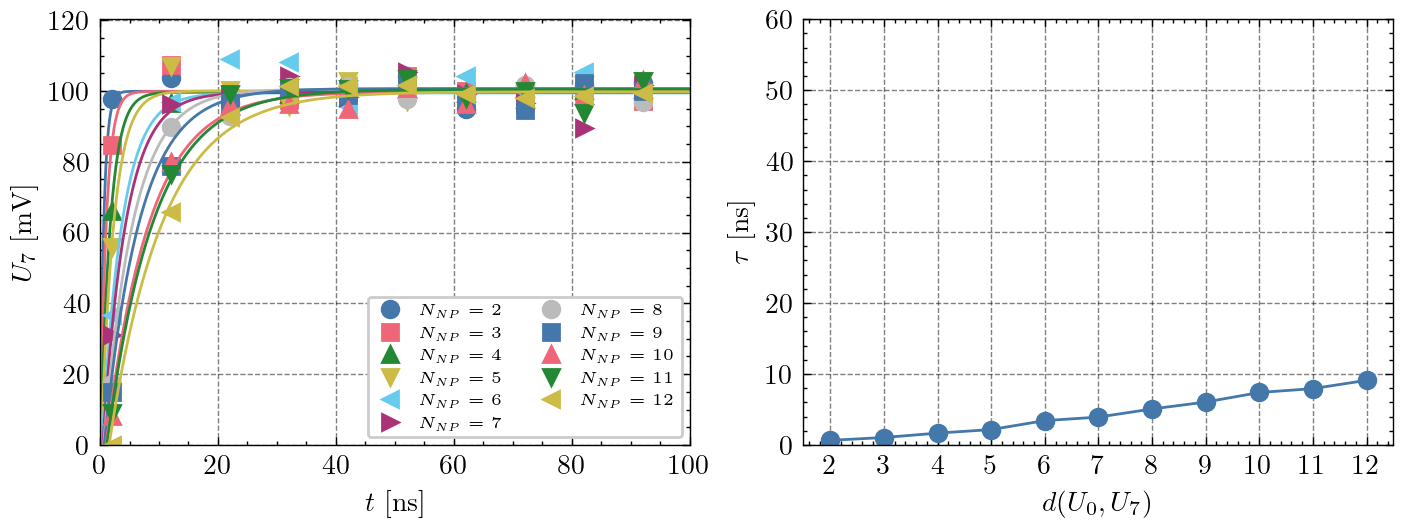

In [21]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data_string_T[N]['Current'].values*1000
    y_val_e = data_string_T[N]['Error'].values*1000
    pp      = ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N}$', marker=ms[i%len(ms)], markevery=(20,100), ls='')
    ax.plot(t_vals, saturation_cuve(t_vals,*params[i]), c=pp[0].get_color())
    # ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='xx-small', ncol=2)
ax.set_xlim(0,100)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, '-o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,60)

fig.savefig(f"../plots/string_at_{T_fold}_time_scale_vs_system_size.svg", transparent=True)
fig.savefig(f"../plots/string_at_{T_fold}_time_scale_vs_system_size.pdf", transparent=False)

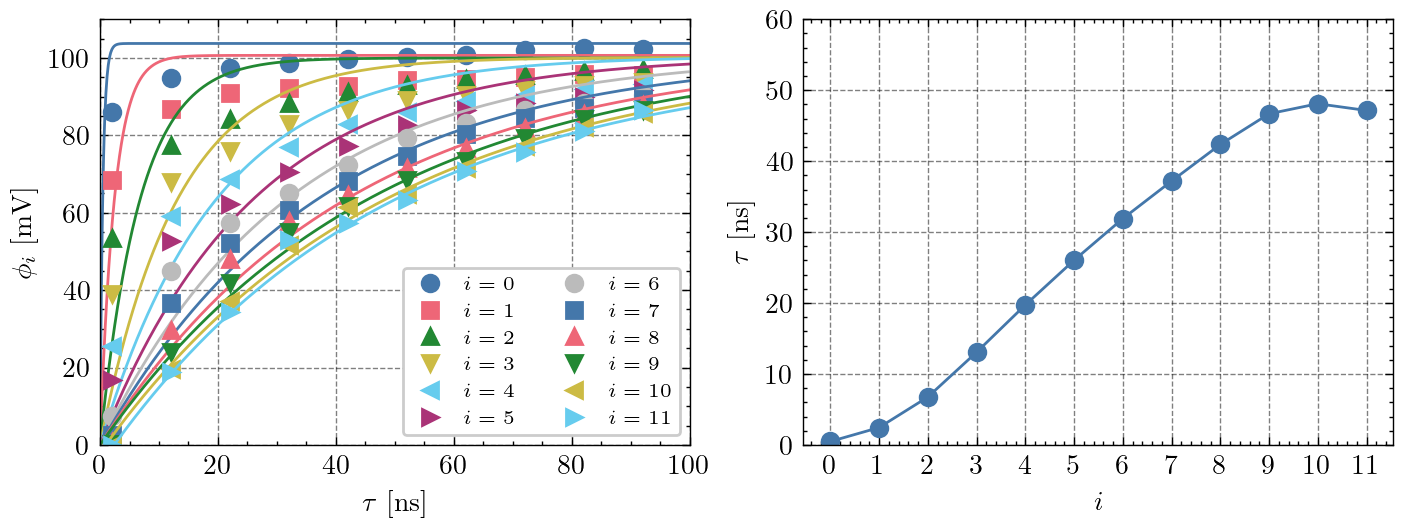

In [395]:
ms  = ['o','s','^','v','<','>']
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

tau_network = []
for i in range(12):

    y   = states_string_T[f"{i}"].values*1000
    # p,_ = curve_fit(saturation_cuve, t_vals, y, p0=[30, 90, 0], bounds=[(0,70,0),(100,120,50)])
    p,_ = curve_fit(saturation_cuve, t_vals[:5000], y[:5000], p0=[30, 90, 0], bounds=[(0,70,0),(60,120,10)])
    tau_network.append(p[0])

    pp  = ax1.plot(t_vals, y, marker=ms[i%len(ms)], label=f'$i = {i}$', markevery=(20,100), ls='')
    ax1.plot(t_vals, saturation_cuve(t_vals, *p), c=pp[0].get_color())

ax1.set_xlim(0,100)
ax1.set_ylim(0,110)
ax1.set_xlabel("$\\tau$ [ns]")
ax1.set_ylabel("$\phi_i$ [mV]")
ax1.legend(ncol=2, fontsize='x-small')

ax2.plot(np.arange(12), tau_network, '-o')
ax2.set_xticks(np.arange(12))
ax2.set_ylabel("$\\tau$ [ns]")
ax2.set_xlabel("$i$")
ax2.set_ylim(0,60)

fig.savefig(f"../plots/string_states_at_{T_fold}_time_scale_vs_system_size.svg", transparent=True)
fig.savefig(f"../plots/string_states_at_{T_fold}_time_scale_vs_system_size.pdf", transparent=False)

## Network

In [396]:
path    = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/wo_magic_cable/time_scale/"
N_vals  = [3,5,7,9,11,13]
data    = {N : pd.read_csv(f"{path}Nx={N}_Ny={N}_Nz=1_Ne=8.csv") for N in N_vals}
x_val   = data[5]['E0'].values*1000
t_val   = np.arange(len(x_val))*1e-10*1e9

In [397]:
taus    = []
params  = []
covs    = []
starts  = len(N_vals)*[0]
stops   = len(N_vals)*[5000]

for i, N in enumerate(N_vals):
    x_fit   = t_vals[starts[i]:stops[i]]
    y_fit   = data[N]['Current'].values[starts[i]:stops[i]]*1000
    p, cov  = curve_fit(saturation_cuve, x_fit, y_fit, p0=[10,20,0], bounds=((0,0,0),(200,30,30)))
    taus.append(p[0])
    params.append(p)
    covs.append(np.sqrt(cov[0,0]))
    
params

[array([1.99251712e+00, 1.02257554e+01, 1.28042214e-15]),
 array([3.23547195, 8.29130547, 0.31573698]),
 array([9.53281751, 9.33353392, 0.89114583]),
 array([26.58196865, 13.24634065,  2.32384624]),
 array([55.79671248, 26.37954224, 10.39363111]),
 array([121.81455837,  29.21508793,  14.8766605 ])]

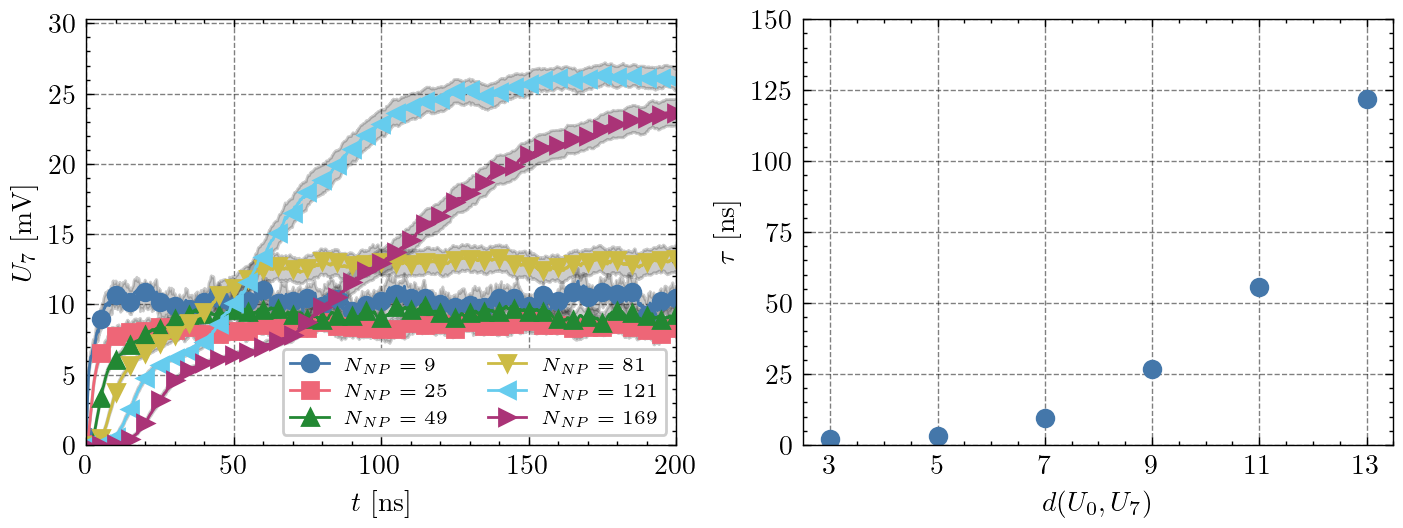

In [400]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
ax  = fig.add_subplot(1,2,1)
ms  = ['o','s','^','v','<','>']

for i, N in enumerate(N_vals):

    y_val   = data[N]['Current'].values*1000
    y_val_e = data[N]['Error'].values*1000
    ax.plot(t_vals, y_val, label='$N_{NP} = '+f'{N**2}$', marker=ms[i%len(ms)], markevery=(50))
    ax.fill_between(t_vals, y_val-y_val_e, y_val+y_val_e, color='black', alpha=0.2)

ax.set_ylabel("$U_7$ [mV]")
ax.set_xlabel("$t$ [ns]")
ax.legend(frameon=True, loc='lower right', fontsize='x-small', ncol=2)
ax.set_xlim(0,200)
ax.set_ylim(0)

ax  = fig.add_subplot(1,2,2)
ax.plot(np.array(N_vals), taus, 'o')
ax.set_ylabel("$\\tau$ [ns]")
ax.set_xlabel("$d(U_0,U_7)$")
ax.set_xticks(N_vals)
ax.set_ylim(0,150)

fig.savefig("../plots/network_time_scale_vs_system_size.svg", transparent=True)
fig.savefig("../plots/network_time_scale_vs_system_size.pdf", transparent=False)

---